__IMPORTS__

In [1]:
#import os
import IGIMF4
import numpy as np
import pandas as pd

In [2]:
#print(os.getcwd())

__INITIAL PARAMETERS__

In [3]:
# Parameters evaluated at time t

metal_mass_fraction = 1e-1 * 0.0142
M_igal = 1e10

In [63]:
# Grids

#mstar_v = np.logspace(-2,np.log10(3.6e3),num=50)
mstar_v = np.logspace(np.log10(0.07),np.log10(150), num=50)
print(f'{mstar_v=}')
print(f'{np.where(mstar_v<0.08)=}')
print(f'{np.where(mstar_v>150)=}\n')

Mecl_v = np.logspace(np.log10(5),10,num=20)
print(f'{Mecl_v=}')
print(f'{np.where(Mecl_v<5)=}')
print(f'{np.where(Mecl_v>5e9)=}\n')

Z_massfrac_v = np.logspace(-9,-1,num=20)
print(f'{Z_massfrac_v=}')
print(f'{np.where(Z_massfrac_v<1e-5)=}')
print(f'{np.where(Z_massfrac_v>0.0142)=}\n')

metallicity_v = np.log10(Z_massfrac_v/0.0142)

mstar_v=array([7.00000000e-02, 8.18610844e-02, 9.57319592e-02, 1.11953171e-01,
       1.30922972e-01, 1.53107092e-01, 1.79050179e-01, 2.09389169e-01,
       2.44868921e-01, 2.86360506e-01, 3.34882594e-01, 3.91626461e-01,
       4.57985240e-01, 5.35588120e-01, 6.26340347e-01, 7.32470000e-01,
       8.56582693e-01, 1.00172554e+00, 1.17146199e+00, 1.36995927e+00,
       1.60209074e+00, 1.87355550e+00, 2.19101836e+00, 2.56227341e+00,
       2.99643542e+00, 3.50416362e+00, 4.09792334e+00, 4.79229212e+00,
       5.60431757e+00, 6.55393591e+00, 7.66446144e+00, 8.96315893e+00,
       1.04819130e+01, 1.22580109e+01, 1.43350581e+01, 1.67640486e+01,
       1.96046171e+01, 2.29265031e+01, 2.68112629e+01, 3.13542722e+01,
       3.66670675e+01, 4.28800844e+01, 5.01458601e+01, 5.86427784e+01,
       6.85794491e+01, 8.01998295e+01, 9.37892145e+01, 1.09681240e+02,
       1.28266075e+02, 1.50000000e+02])
np.where(mstar_v<0.08)=(array([0]),)
np.where(mstar_v>150)=(array([49]),)

Mecl_v=array([5.00000000e

In [64]:

print(f'{metallicity_v=}')

metallicity_v=array([-7.15228834e+00, -6.73123571e+00, -6.31018308e+00, -5.88913045e+00,
       -5.46807782e+00, -5.04702519e+00, -4.62597255e+00, -4.20491992e+00,
       -3.78386729e+00, -3.36281466e+00, -2.94176203e+00, -2.52070940e+00,
       -2.09965677e+00, -1.67860413e+00, -1.25755150e+00, -8.36498871e-01,
       -4.15446239e-01,  5.60639246e-03,  4.26659024e-01,  8.47711656e-01])


__DOWNSIZING CLASS__

In [5]:
downsizing_obj = IGIMF4.Downsizing(M_igal)

In [6]:
downsizing_obj.downsizing_time

0.9689945113416355

In [7]:
downsizing_obj.M_igal

10000000000.0

In [8]:
downsizing_obj.SFR

10.319975895585161

__IGIMF CLASS__

In [9]:
igimf4_obj = IGIMF4.IGIMF(metal_mass_fraction, downsizing_obj.SFR)

In [10]:
igimf4_obj.alpha_1

0.4948600000000001

In [11]:
igimf4_obj.alpha_2

1.49486

In [12]:
igimf4_obj.SFR

10.319975895585161

In [13]:
igimf4_obj.Mtot

103199758.95585161

In [14]:
ECMF_res = igimf4_obj.ECMF()

In [15]:
ECMF_v = ECMF_res[2](Mecl_v)

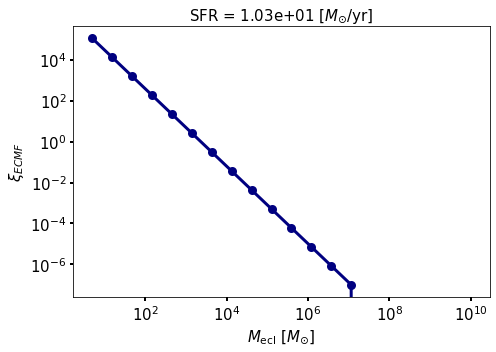

In [16]:
igimf4_obj.ECMF_plot(Mecl_v, ECMF_v)

In [17]:
SFR_v = np.logspace(-4,3,num=10)
print(f"{SFR_v=}")

SFR_v=array([1.00000000e-04, 5.99484250e-04, 3.59381366e-03, 2.15443469e-02,
       1.29154967e-01, 7.74263683e-01, 4.64158883e+00, 2.78255940e+01,
       1.66810054e+02, 1.00000000e+03])


In [18]:
ECMF_v_list = []
beta_ECMF_list = []
MeclMax_list = []
for S in SFR_v:
    igimf4 = IGIMF4.IGIMF(metal_mass_fraction, S)
    beta_ECMF_list.append(igimf4.beta_ECMF)
    #print(f'SFR={S}, beta={igimf4.beta_ECMF}')
    ECMF_res = igimf4.ECMF()
    ECMF_v = ECMF_res[2](Mecl_v)
    MeclMax_list.append(ECMF_res[1])
    ECMF_v_list.append(ECMF_v)
    #igimf4.ECMF_plot(Mecl_v, ECMF_v)

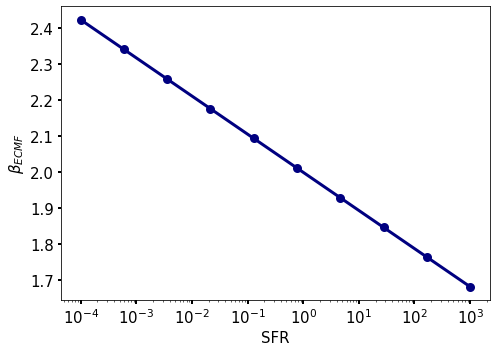

In [19]:
igimf4.beta_ECMF_plot(SFR_v, beta_ECMF_list)

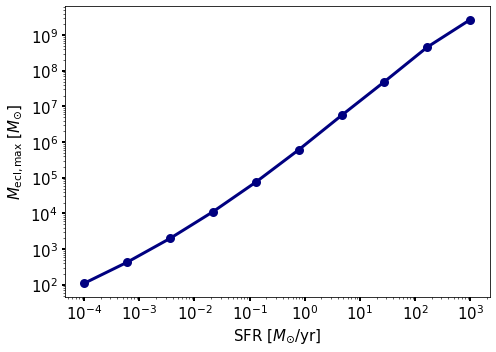

In [20]:
igimf4_obj.MeclMax_plot(SFR_v, MeclMax_list)

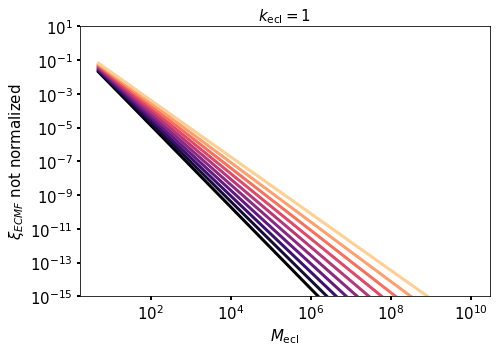

In [21]:
igimf4_obj.Mecl_power_beta_plot(Mecl_v, beta_ECMF_list, SFR_v)

<Figure size 432x288 with 0 Axes>

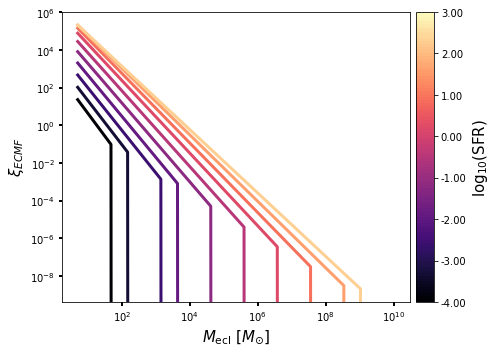

In [22]:
igimf4_obj.ECMF_plots(Mecl_v, ECMF_v_list, SFR_v)

In [23]:
Mtot_IMF = 1e2
sIMF = igimf4_obj.stellar_IMF(Mtot_IMF)

Mtot = 100.0,	 m_max = 12.430279210437202,	 k(m_max)=35.82290815573153


In [24]:
IMF_v = sIMF[2](mstar_v)

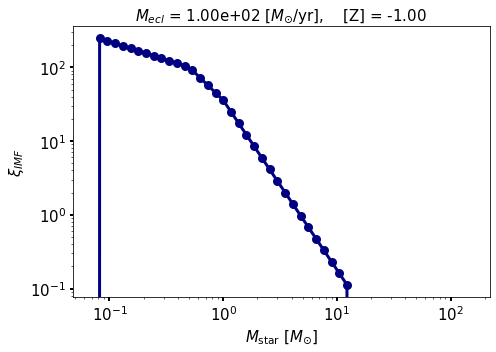

In [25]:
igimf4_obj.IMF_plot(mstar_v, IMF_v, Mtot_IMF)

In [26]:
IMF_v_list = []
m_max_list = []
k_IMF_list = []
for M in Mecl_v:
    igimf4 = IGIMF4.IGIMF(metal_mass_fraction, downsizing_obj.SFR)
    sIMF = igimf4.stellar_IMF(M)
    print (f"M=%.2e,\t alpha1=%.2f,\t alpha2=%.2f,\t alpha3=%.2f,\t m_max = %.2e,\t [Z] = %.2f"%(M, sIMF[4], sIMF[5], sIMF[6], sIMF[1], igimf4.metallicity))
    IMF_v = sIMF[2](mstar_v)
    m_max_list.append(sIMF[1])
    k_IMF_list.append(sIMF[0])
    IMF_v_list.append(IMF_v)
    #igimf4.ECMF_plot(Mecl_v, ECMF_v)

Mtot = 5.000000000000001,	 m_max = 1.9368247754115748,	 k(m_max)=3.080947453614145
M=5.00e+00,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 1.94e+00,	 [Z] = -1.00
Mtot = 15.434689558663091,	 m_max = 3.7474569337095534,	 k(m_max)=7.301344263644519
M=1.54e+01,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 3.75e+00,	 [Z] = -1.00
Mtot = 47.64592835446067,	 m_max = 7.653095215282607,	 k(m_max)=18.711254973375425
M=4.76e+01,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 7.65e+00,	 [Z] = -1.00
Mtot = 147.0800225770808,	 m_max = 16.01614903609919,	 k(m_max)=50.61072528402749
M=1.47e+02,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 1.60e+01,	 [Z] = -1.00
Mtot = 454.02689775168,	 m_max = 33.00406392972698,	 k(m_max)=142.37533057268072
M=4.54e+02,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 3.30e+01,	 [Z] = -1.00
Mtot = 1401.5528436160096,	 m_max = 62.48129624519525,	 k(m_max)=413.1434485606823
M=1.40e+03,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 6.25e+01,	 

In [27]:
k_IMF_list = np.array(k_IMF_list)
k_idx = np.where(k_IMF_list<=1e10)[0]
print(Mecl_v[k_idx])
print(k_IMF_list)

[5.00000000e+00 1.54346896e+01 4.76459284e+01 1.47080023e+02
 4.54026898e+02 1.40155284e+03 4.32650661e+03 1.33556573e+04
 4.12280848e+04 1.27268538e+05 3.92870075e+05 1.21276553e+06
 3.74373189e+06 1.15566679e+07 3.56747162e+07 1.10125634e+08
 3.39950995e+08 1.04940761e+09 3.23945615e+09 1.00000000e+10]
[3.08094745e+00 7.30134426e+00 1.87112550e+01 5.06107253e+01
 1.42375331e+02 4.13143449e+02 1.16513420e+03 2.91735149e+03
 7.12275386e+03 1.68173649e+04 3.82594778e+04 8.38853860e+04
 1.77712940e+05 3.65186005e+05 7.31059541e+05 1.43176260e+06
 2.75368731e+06 5.21770343e+06 9.76581309e+06 1.80933528e+07]


[5.00000000e+00 7.74081954e+00 1.19840574e+01 1.85532852e+01
 2.87235265e+01 4.44687271e+01 6.88448783e+01 1.06583156e+02
 1.65008195e+02 2.55459732e+02 3.95493537e+02 6.12288820e+02
 9.47923453e+02 1.46754088e+03 2.27199382e+03 3.51741883e+03
 5.44554089e+03 8.43058986e+03 1.30519350e+04 2.02065346e+04
 3.12830276e+04 4.84312543e+04 7.49795199e+04 1.16080587e+05
 1.79711775e+05 2.78223283e+05 4.30735246e+05 6.66848761e+05
 1.03239118e+06 1.59831077e+06 2.47444705e+06 3.83084962e+06
 5.93078311e+06 9.18182436e+06 1.42149691e+07 2.20071021e+07
 3.40706012e+07 5.27468751e+07 8.16608083e+07 1.26424316e+08
 1.95725563e+08 3.03015253e+08 4.69117279e+08 7.26270439e+08
 1.12438568e+09 1.74073333e+09 2.69494052e+09 4.17220964e+09
 6.45926439e+09 1.00000000e+10]
[3.08094745e+00 4.25652178e+00 5.96825062e+00 8.47518164e+00
 1.21671721e+01 1.76328807e+01 2.57640042e+01 3.79155832e+01
 5.61533698e+01 8.36368943e+01 1.25214742e+02 1.88352341e+02
 2.84580454e+02 4.31755847e+02 6.57580213e+02 9.82315306e+02
 1.40742040e+03 2.01083186e+03 2.86384001e+03 4.06342724e+03
 5.74048624e+03 8.07049136e+03 1.12871676e+04 1.56998735e+04
 2.17156299e+04 2.98669853e+04 4.08472247e+04 5.55548308e+04
 7.51496067e+04 1.01123505e+05 1.35389990e+05 1.80396742e+05
 2.39267734e+05 3.15982238e+05 4.15600190e+05 5.44545746e+05
 7.10963756e+05 9.25167631e+05 1.20020155e+06 1.55254588e+06
 2.00300143e+06 2.57779763e+06 3.30998004e+06 4.24114686e+06
 5.42362212e+06 6.92317067e+06 8.82239293e+06 1.12249696e+07
 1.42609470e+07 1.80933528e+07]

<Figure size 432x288 with 0 Axes>

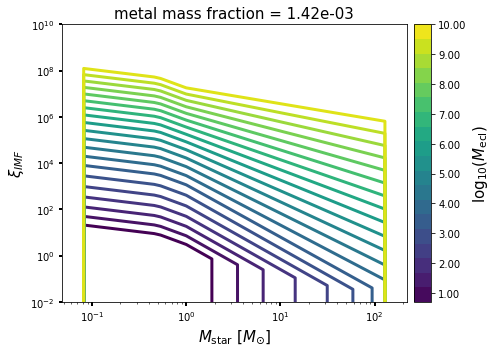

In [28]:
igimf4_obj.IMF_plots(mstar_v, IMF_v_list, Mecl_v, k_idx, metal_mass_fraction)

In [29]:
metallicity_v

array([-7.15228834e+00, -6.73123571e+00, -6.31018308e+00, -5.88913045e+00,
       -5.46807782e+00, -5.04702519e+00, -4.62597255e+00, -4.20491992e+00,
       -3.78386729e+00, -3.36281466e+00, -2.94176203e+00, -2.52070940e+00,
       -2.09965677e+00, -1.67860413e+00, -1.25755150e+00, -8.36498871e-01,
       -4.15446239e-01,  5.60639246e-03,  4.26659024e-01,  8.47711656e-01])

In [30]:
IMF_Z_v_list = []
for M in Mecl_v:
    IMF_Z_list = []
    for Z in Z_massfrac_v:
        igimf4_Z = IGIMF4.IGIMF(Z, downsizing_obj.SFR)
        sIMF_Z = igimf4_Z.stellar_IMF(M)
        print (f"M=%.2e,\t alpha1=%.2f,\t alpha2=%.2f,\t alpha3=%.2f,\t m_max = %.2e,\t [Z] = %.2f"%(M, sIMF_Z[4], sIMF_Z[5], sIMF_Z[6], sIMF_Z[1], igimf4_Z.metallicity))
        IMF_Z = sIMF_Z[2](mstar_v)
        IMF_Z_list.append(IMF_Z)
        #igimf4_Z.IMF_plots(mstar_v, IMF_Z, Mecl_v, k_idx, Z)
    IMF_Z_v_list.append(IMF_Z_list)
    

Mtot = 5.000000000000001,	 m_max = 1.9787611612872578,	 k(m_max)=3.168263910559302
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -7.15
Mtot = 5.000000000000001,	 m_max = 1.9787611143440116,	 k(m_max)=3.168263812494976
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -6.73
Mtot = 5.000000000000001,	 m_max = 1.9787609905688563,	 k(m_max)=3.168263553928983
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -6.31
Mtot = 5.000000000000001,	 m_max = 1.9787606642223237,	 k(m_max)=3.1682628721919084
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -5.89
Mtot = 5.000000000000001,	 m_max = 1.9787598037573513,	 k(m_max)=3.168261074682943
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -5.47
Mtot = 5.000000000000001,	 m_max = 1.9787575350099076,	 k(m_max)=3.1682563352769186
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+0

In [31]:
IMF_Z_v_list[0][2]

array([ 0.        , 17.47793651, 16.40330111, 15.39473994, 14.44819042,
       13.55983973, 12.72610952, 11.94364142, 11.20928357, 10.5200779 ,
        9.87324822,  9.26618902,  8.69645502,  7.61942896,  6.11482554,
        4.90733512,  3.93828701,  3.15572521,  2.20164066,  1.53600876,
        1.07162035,  0.74763256,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

<Figure size 432x288 with 0 Axes>

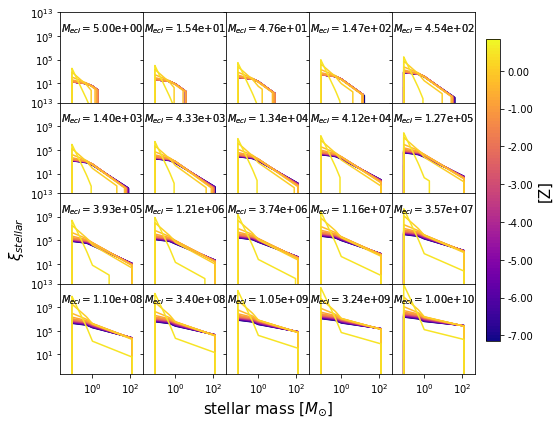

In [32]:
igimf4_Z.sIMF_subplot(metallicity_v, Mecl_v, mstar_v, IMF_Z_v_list)

<Figure size 432x288 with 0 Axes>

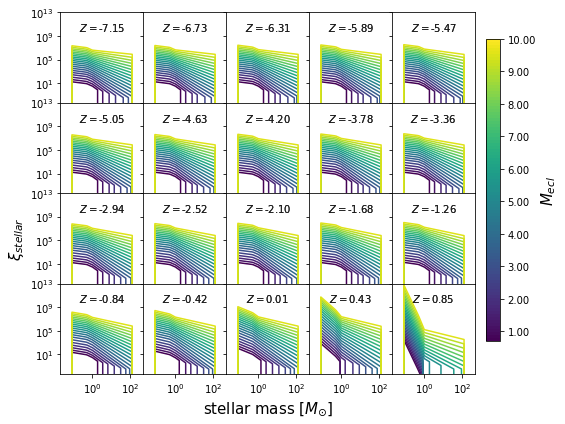

In [33]:
igimf4_Z.sIMF_subplot_Mecl(metallicity_v, Mecl_v, mstar_v, IMF_Z_v_list)

<Figure size 432x288 with 0 Axes>

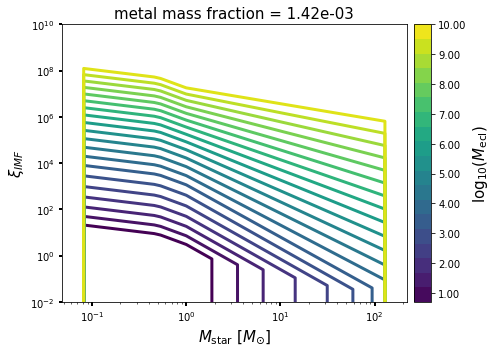

In [34]:
igimf4_obj.IMF_plots(mstar_v, IMF_v_list, Mecl_v, k_idx, metal_mass_fraction)

In [35]:
IMF_v_Z_list = []
alpha1_Z_list = []
alpha3_Z_list = []
m_max_Z_list = []
k_IMF_Z_list = []
for Z in Z_massfrac_v:
    IMF_v_list = []
    alpha1_list = []
    alpha3_list = []
    m_max_list = []
    k_IMF_list = []
    for M in Mecl_v:
        igimf4 = IGIMF4.IGIMF(Z, downsizing_obj.SFR)
        sIMF = igimf4.stellar_IMF(M)
        print (f"M=%.2e,\t alpha1=%.2f,\t alpha2=%.2f,\t alpha3=%.2f,\t m_max = %.2e,\t [Z] = %.2f"%(M, sIMF[4], sIMF[5], sIMF[6], sIMF[1], igimf4.metallicity))
        IMF_v = sIMF[2](mstar_v)
        alpha1_list.append(sIMF[4])
        alpha3_list.append(sIMF[6])
        m_max_list.append(sIMF[1])
        k_IMF_list.append(sIMF[0])
        IMF_v_list.append(IMF_v)
        #igimf4.ECMF_plot(Mecl_v, ECMF_v)
    IMF_v_Z_list.append(IMF_v_list)
    alpha1_Z_list.append(alpha1_list)
    alpha3_Z_list.append(alpha3_list)
    m_max_Z_list.append(m_max_list)
    k_IMF_Z_list.append(k_IMF_list)
    

Mtot = 5.000000000000001,	 m_max = 1.9787611612872578,	 k(m_max)=3.168263910559302
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -7.15
Mtot = 15.434689558663091,	 m_max = 3.8164945814844384,	 k(m_max)=7.478183067905145
M=1.54e+01,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 3.82e+00,	 [Z] = -7.15
Mtot = 47.64592835446067,	 m_max = 7.7765959343993805,	 k(m_max)=19.11331507105366
M=4.76e+01,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 7.78e+00,	 [Z] = -7.15
Mtot = 147.0800225770808,	 m_max = 17.07138207879062,	 k(m_max)=50.03038870569443
M=1.47e+02,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.27,	 m_max = 1.71e+01,	 [Z] = -7.15
Mtot = 454.02689775168,	 m_max = 43.96450300800232,	 k(m_max)=118.0105047790484
M=4.54e+02,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.15,	 m_max = 4.40e+01,	 [Z] = -7.15
Mtot = 1401.5528436160096,	 m_max = 91.58252213475178,	 k(m_max)=269.7689076875154
M=1.40e+03,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.03,	 m_max = 9.16e+01,	 [

In [36]:
Z_massfrac_v

array([1.00000000e-09, 2.63665090e-09, 6.95192796e-09, 1.83298071e-08,
       4.83293024e-08, 1.27427499e-07, 3.35981829e-07, 8.85866790e-07,
       2.33572147e-06, 6.15848211e-06, 1.62377674e-05, 4.28133240e-05,
       1.12883789e-04, 2.97635144e-04, 7.84759970e-04, 2.06913808e-03,
       5.45559478e-03, 1.43844989e-02, 3.79269019e-02, 1.00000000e-01])

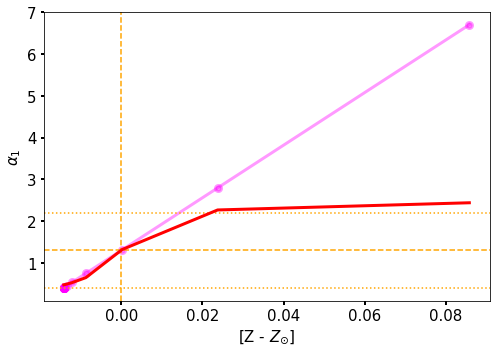

In [37]:
def alpha1_Z_plot(Z_massfrac_v, alpha1_Z_list):
    from matplotlib import pyplot as plt
    import matplotlib.ticker as ticker
    Msun = r'$M_{\odot}$'
    fig, ax = plt.subplots(1,1, figsize=(7,5))
    #ax.plot(np.log10(Z_massfrac_v)-0.0142, [alpha1_Z_list[i][0] for i in range(len(SFR_v))], linewidth=3, color='magenta')
    #ax.scatter(np.log10(Z_massfrac_v)-0.0142, [alpha1_Z_list[i][0] for i in range(len(SFR_v))], linewidth=3, color='magenta')
    ax.plot(Z_massfrac_v- 0.0142, [alpha1_Z_list[i][0] for i in range(len(Z_massfrac_v))], linewidth=3, color='magenta', alpha=0.4)
    ax.scatter(Z_massfrac_v- 0.0142, [alpha1_Z_list[i][0] for i in range(len(Z_massfrac_v))], linewidth=3, color='magenta', alpha=0.4)
    ax.set_ylabel(r'$\alpha_1$', fontsize=15)
    ax.set_xlabel(r'[Z - $Z_{\odot}$]', fontsize=15)
    ax.axhline(1.3 - 63*0.0142, linestyle=':', color='orange')
    ax.axhline(1.3 + 63*0.0142, linestyle=':', color='orange')
    ax.axhline(1.3, linestyle='--', color='orange')
    ax.axvline(0, linestyle='--', color='orange')
    ax.plot(Z_massfrac_v - 0.0142, 1.3 + np.arctan(1.3e2*(Z_massfrac_v - 0.0142))/1.3, color='red', linewidth=3)
    #plt.title(r'SFR = %.2e [%s/yr]' %(self.SFR, Msun), fontsize=15)
    #ax.set_ylim(5e-2,1e8)
    #ax.set_xlim(1e-11,1e0)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    ax.tick_params(width=2)
    fig.tight_layout()
    #plt.savefig(f'Z_plot_{name}.pdf', bbox_inches='tight')
    plt.show(block=False)
alpha1_Z_plot(Z_massfrac_v, alpha1_Z_list)

In [38]:
k_IMF_Z_list[0]

[3.168263910559302,
 7.478183067905145,
 19.11331507105366,
 50.03038870569443,
 118.0105047790484,
 269.7689076875154,
 609.1841397150881,
 1360.0341336483307,
 2964.8357885304836,
 6275.375126203836,
 12904.19619514298,
 25861.78454588441,
 50709.175250763015,
 97634.4571987328,
 185177.27184293116,
 346882.5888345329,
 643146.0738967945,
 1182236.8244647607,
 2157504.6442430154,
 3913060.085603734]

In [39]:
Z_massfrac_v.shape

(20,)

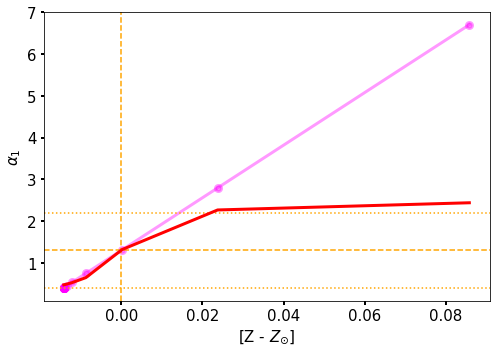

In [40]:
alpha1_Z_plot(Z_massfrac_v, alpha1_Z_list)

<Figure size 432x288 with 0 Axes>

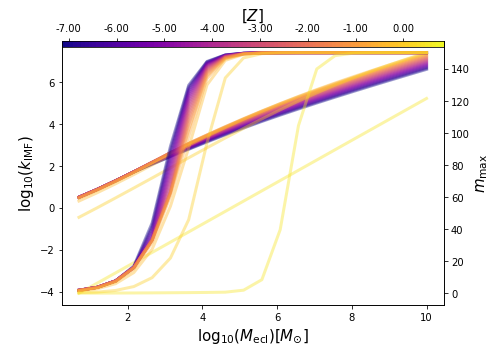

In [41]:
igimf4_obj.k_Z_plot(Z_massfrac_v, k_IMF_Z_list, m_max_Z_list, Mecl_v)

In [42]:
k_IMF_Z_list[0][:20]

[3.168263910559302,
 7.478183067905145,
 19.11331507105366,
 50.03038870569443,
 118.0105047790484,
 269.7689076875154,
 609.1841397150881,
 1360.0341336483307,
 2964.8357885304836,
 6275.375126203836,
 12904.19619514298,
 25861.78454588441,
 50709.175250763015,
 97634.4571987328,
 185177.27184293116,
 346882.5888345329,
 643146.0738967945,
 1182236.8244647607,
 2157504.6442430154,
 3913060.085603734]

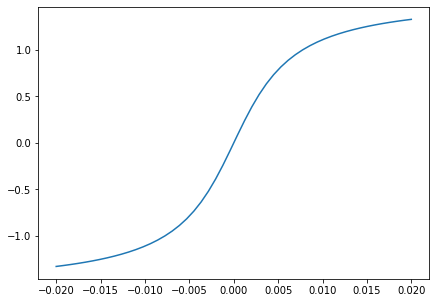

In [43]:
from matplotlib import pyplot as plt
x = np.linspace(-0.02,0.02,num=50)
fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.plot(x, np.arctan(200*x))
plt.show(block=False)

In [44]:
np.pi/2

1.5707963267948966

In [45]:
# IMF_v_list = []
# m_max_list = []
# k_IMF_list = []
# metal_mass_fraction = 1e-1 * 0.0142
# for S in SFR_v:
#     igimf4 = IGIMF4.IGIMF(metal_mass_fraction, S)
    
#     sIMF = igimf4_obj.stellar_IMF(M)
#     print (f"M=%.2e,\t alpha1=%.2f,\t alpha2=%.2f,\t alpha3=%.2f,\t m_max = %.2e,\t [Z] = %.2f"%(M, sIMF[4], sIMF[5], sIMF[6], sIMF[1], igimf4.metallicity))
#     IMF_v = sIMF[2](mstar_v)
#     m_max_list.append(sIMF[1])
#     k_IMF_list.append(sIMF[0])
#     IMF_v_list.append(IMF_v)
#     #igimf4.ECMF_plot(Mecl_v, ECMF_v)

In [46]:
#def sIMF_subplot():
    # import matplotlib.pyplot as plt 
    # import itertools
    # from mpl_toolkits import mplot3d
    # from mpl_toolkits.mplot3d import Axes3D
    # from mpl_toolkits.axes_grid1 import make_axes_locatable
    # cm = plt.cm.get_cmap(name='viridis')
    # levels = np.linspace(Z_sqr_v[0], Z_sqr_v[-1], 100, endpoint=True)
    # CS3 = plt.contourf([[0,0],[0,0]], levels, cmap=cm)
    # plt.clf()
    # num_colors=50
    # currentColors = [cm(1.*i/num_colors) for i in range(num_colors)]
    # currentColor = itertools.cycle(currentColors)
    # fig, axs = plt.subplots(4, 5, figsize=(8,6))
    # for i, ax in enumerate(axs.flat):
    #     for j, Z in enumerate(Z_sqr_mesh):
    #         ax.annotate(r'$M_{ecl}=$%.2e'%(M_ecl_v[i]), xy=(0.5, 0.9), xycoords='axes fraction', horizontalalignment='center', verticalalignment='top', fontsize=7, alpha=0.7)
    #         ax.loglog(mstar_v, [sIMF[j,i](m) for m in mstar_v], color=next(currentColor))
    #         ax.set_ylim(2e-5,1e11)
    #         ax.set_xlim(2e-2,5e2)
    # for nr in range(4):
    #     for nc in range(5):
    #         if nc != 0:
    #             axs[nr,nc].set_yticklabels([])
    #         if nr != 4-1:
    #             axs[nr,nc].set_xticklabels([])
    # axs[4//2,0].set_ylabel(r'$\xi_{stellar}$', fontsize = 15)
    # axs[4-1, 5//2].set_xlabel(r'Masses [$M_{\odot}$]', fontsize = 15)
    # #divider = make_axes_locatable(axs.flat[-1])
    # plt.subplots_adjust(bottom=0., right=0.95, top=1.)
    # cax = plt.axes([0.85, 0.2, 0.025, 0.7])#divider.append_axes("right", size="5%", pad="2%")
    # cbar = plt.colorbar(CS3, cmap=cm, cax=cax, format="%.2f").set_label(label=r'[Z]',size=15)
    # fig.tight_layout(rect=[0,0,0.85,1])
    # fig.subplots_adjust(wspace=0., hspace=0.)
    # fig.savefig('stellarIMF_subplots.pdf')
#sIMF_subplot()

Mtot = 1000.0,	 m_max = 52.86375768890743,	 k(m_max)=304.4349181117193


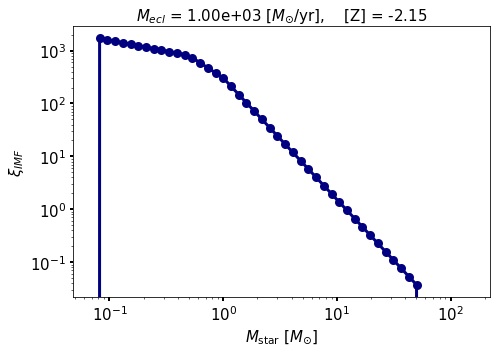

In [47]:
low_Z = 1e-4
Mtot_lowZ_IMF = 1e3
igimf4_metalpoor = IGIMF4.IGIMF(low_Z, downsizing_obj.SFR)
sIMF_lowZ = igimf4_metalpoor.stellar_IMF(Mtot_lowZ_IMF)
igimf4_metalpoor.IMF_plot(mstar_v, sIMF_lowZ[2](mstar_v), Mtot_lowZ_IMF)

Mtot = 3000.0,	 m_max = 0.1909607644977802,	 k(m_max)=1.398922930896866e-08


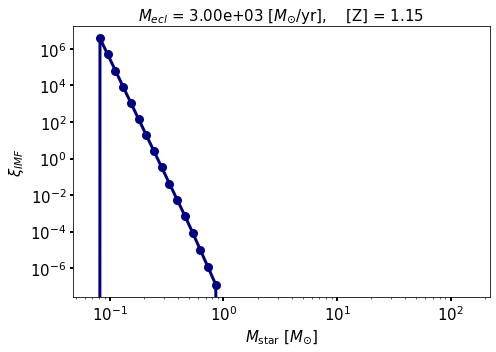

In [48]:
high_Z = 2e-1
Mtot_highZ_IMF = 3e3
igimf4_metalrich = IGIMF4.IGIMF(high_Z, downsizing_obj.SFR)
sIMF_highZ = igimf4_metalrich.stellar_IMF(Mtot_highZ_IMF)
igimf4_metalrich.IMF_plot(mstar_v, sIMF_highZ[2](mstar_v), Mtot_highZ_IMF)

In [49]:
# IMF_Z_v_list = []
# for Z in Z_massfrac_v:
#     IMF_Mecl_v_list = []
#     for M in Mecl_v:
#         igimf4 = IGIMF4.IGIMF(Z, downsizing_obj.SFR)
#         sIMF = igimf4_obj.stellar_IMF(M)
#         IMF_v = sIMF[2](mstar_v)
#         IMF_v_list.append(IMF_v)
#         #igimf4.ECMF_plot(Mecl_v, ECMF_v)
#     IMF_Z_v_list.append(IMF_Mecl_v_list)

In [50]:

def normalization_IMF(IMF, alpha1, alpha2, alpha3, Mtot, lower_lim, mass12, mass23, upper_lim) -> (float, float):
    def integral_IMF(ll, ul, power):
        if ll < ul:
            return np.divide(ul**(1-power) - ll**(1-power), 1-power)
        else:
            return 0.
    k = lambda x: (np.reciprocal(2* integral_IMF(x, mass12, alpha1) 
                                + integral_IMF(mass12, mass23, alpha2) 
                                + integral_IMF(mass23, upper_lim, alpha3)))
    def weighted_IMF(m, x, alpha3):
        return m * IMF(m, alpha3) * k(x)
    func = lambda x: (integr.quad(weighted_IMF, lower_lim, x, args=(x, alpha3))[0] - Mtot)
    sol = optimize.root_scalar(func, x0=0.09, x1=2, rtol=1e-8)
    m_max = sol.root
    return k(m_max), m_max

In [51]:
def integral_IMF(ll, ul, power):
    if ll < ul:
        return np.divide(ul**(1-power) - ll**(1-power), 1-power)
    else:
        return 0.

In [52]:
alpha1 = 1.3
alpha2 = 2.3
alpha3 = 2.3
lower_lim = 0.07
mass12 = 0.5
mass23 = 1
upper_lim = 150

In [53]:
k = (np.vectorize(lambda x: (np.reciprocal(2* integral_IMF(x, mass12, alpha1) 
                            + integral_IMF(mass12, mass23, alpha2) 
                            + integral_IMF(mass23, upper_lim, alpha3)))))

In [54]:
    def k(x):
        if (x > lower_lim and x < mass12):
            return (np.reciprocal(2* integral_IMF(x, mass12, alpha1) 
                                + integral_IMF(mass12, mass23, alpha2) 
                                + integral_IMF(mass23, upper_lim, alpha3)))
        if (x > mass12 and x < mass23):
            return (np.reciprocal(integral_IMF(x, mass23, alpha2) 
                                + integral_IMF(mass23, upper_lim, alpha3)))
        if (x > mass23 and x < upper_lim):
            return (np.reciprocal(integral_IMF(x, upper_lim, alpha3)))
        else:
            return 0.

In [55]:
k_v = [k(m) for m in mstar_v]
#k_v[] = 0.
print(k_v)

[0.11779524661026457, 0.128037663045496, 0.13962093839420645, 0.15281125260243217, 0.16795003134425457, 0.1854825686445684, 0.20600079112037994, 0.23030904674131183, 0.2595288064273793, 0.29527206728841676, 0.3399425082679171, 0.3972895748975763, 0.4735036594248487, 0.5777096853253435, 0.7081863045632475, 0.8681604298950504, 1.0643153781895518, 1.3048561013573963, 1.5998593423171592, 1.9617062370886515, 2.4056177121014284, 2.95031851272049, 3.6188628897649764, 4.439664497737123, 5.4477858331179325, 6.686559896364633, 8.209640675067249, 10.083612497741102, 12.39133585818066, 15.236276056076967, 18.748162185063713, 23.090475790032105, 28.470500890857043, 35.15303068646404, 43.47940898319098, 53.894543203049196, 66.98615053292446, 83.5433448173429, 104.64684994198376, 131.81296807218445, 167.23312084492912, 214.19262666330414, 277.8480264961387, 366.78139497594543, 496.41961915366903, 697.5826408942467, 1042.1286925807694, 1745.5366989834215, 3884.9873506273657, 0.0]


In [56]:
def weighted_IMF(m, x, alpha3):
    return m * igimf4_obj.initial_mass_function(m, alpha3) * k(x)

In [57]:
IMFfunc = np.vectorize(lambda x: (integr.quad(weighted_IMF, lower_lim, x, args=(x, alpha3))[0] - Mtot_IMF))

In [58]:
from scipy import optimize
import scipy.integrate as integr
#sol = optimize.root_scalar(IMFfunc, x0=1, x1=20, rtol=1e-8)

In [59]:
#sol.root